In [170]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [171]:
def generate_random_value():
    return random.randint(0, 1)

def generate_data(n):
    return [generate_random_value() for _ in range(n)]

def generate_datas(n, m):
    return [generate_data(n) for _ in range(m)]

def fitness(data):
    return sum(item for item in data) 

In [172]:
def selection(items):    
    while True:
        idx1 = random.randint(0, len(items)-1)
        idx2 = random.randint(0, len(items)-1)
        
        if (idx1 > idx2):
            return items[idx1]
        elif (idx1 < idx2):
            return items[idx2]
        

def scrossover(item1, item2, rate = 0.9):
    i1 = item1.copy()
    i2 = item2.copy()
    
    for i in range(len(i1)):
        if (random.random() < rate):
            i1[i], i2[i] = i2[i], i1[i]
    
    return i1, i2
            
            
def mutate(data, mutation_rate = 0.05):
    for i in range(len(data)):
        if random.random() < mutation_rate:
            data[i] = generate_random_value()
            
    return data


[14, 14, 15, 15, 16, 16, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21]


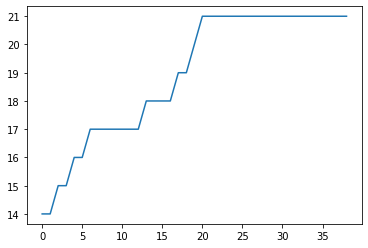

In [202]:
fitnesses = []

def create_new_data(old_data, m):
    sorted_old_data = sorted(old_data, key=fitness)
    
    curr_fitness = fitness(sorted_old_data[-1])
    fitnesses.append(curr_fitness)
    
    new_datas = []
    while (len(new_datas) < m):
        
        good_data_1 = selection(sorted_old_data)
        good_data_2 = selection(sorted_old_data)
    
        good_data_1, good_data_2 = scrossover(good_data_1, good_data_2)
    
        good_data_1 = mutate(good_data_1)
        good_data_2 = mutate(good_data_2)
        
        new_datas.append(good_data_1)
        new_datas.append(good_data_2)
        
    return new_datas


n = 21
m  = 31
n_generation = 1
items = generate_datas(n, m)

while True:
    items = create_new_data(items, m)
    
    #codition to end
    sorted_data = sorted(items, key=fitness)
    a = fitness(sorted_data[0])
    b = fitness(sorted_data[-1])
    
    if (b-a <= 2 or n_generation >= 50):
        break
    else:
        n_generation += 1
        
X = np.arange(0, n_generation, 1)
plt.plot(X, fitnesses)

print(fitnesses)